In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## **Breast Cancer Detection** 

In [2]:
# importing libraries 
import pandas as pd # for data manupulation or analysis 
import numpy as np # for numeric calculations 
import matplotlib.pyplot as plt # for data visualization  
import seaborn as sns # for data visualization 

In [3]:
# Loading dataset
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

### **EDA**

In [4]:
cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
type(cancer_dataset)

sklearn.utils._bunch.Bunch

In [6]:
# keys in dataset(features)
cancer_dataset.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# features of each cell in numeric format 
cancer_dataset['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
# target value names malignant and benign tumor
cancer_dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# description of data 
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [10]:
# names of features
print(cancer_dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## **Creating DataFrame**

In [11]:
# creating the dataframe 
cancer_df = pd.DataFrame(np.c_[cancer_dataset['data'], cancer_dataset['target']],
                        columns = np.append(cancer_dataset['feature_names'],['target']))

In [12]:
cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
# information of dataset
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [15]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### **Data Visualization**

In [16]:
# pairplot of dataframe
# sns.pairplot(cancer_df, hue = 'target')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option

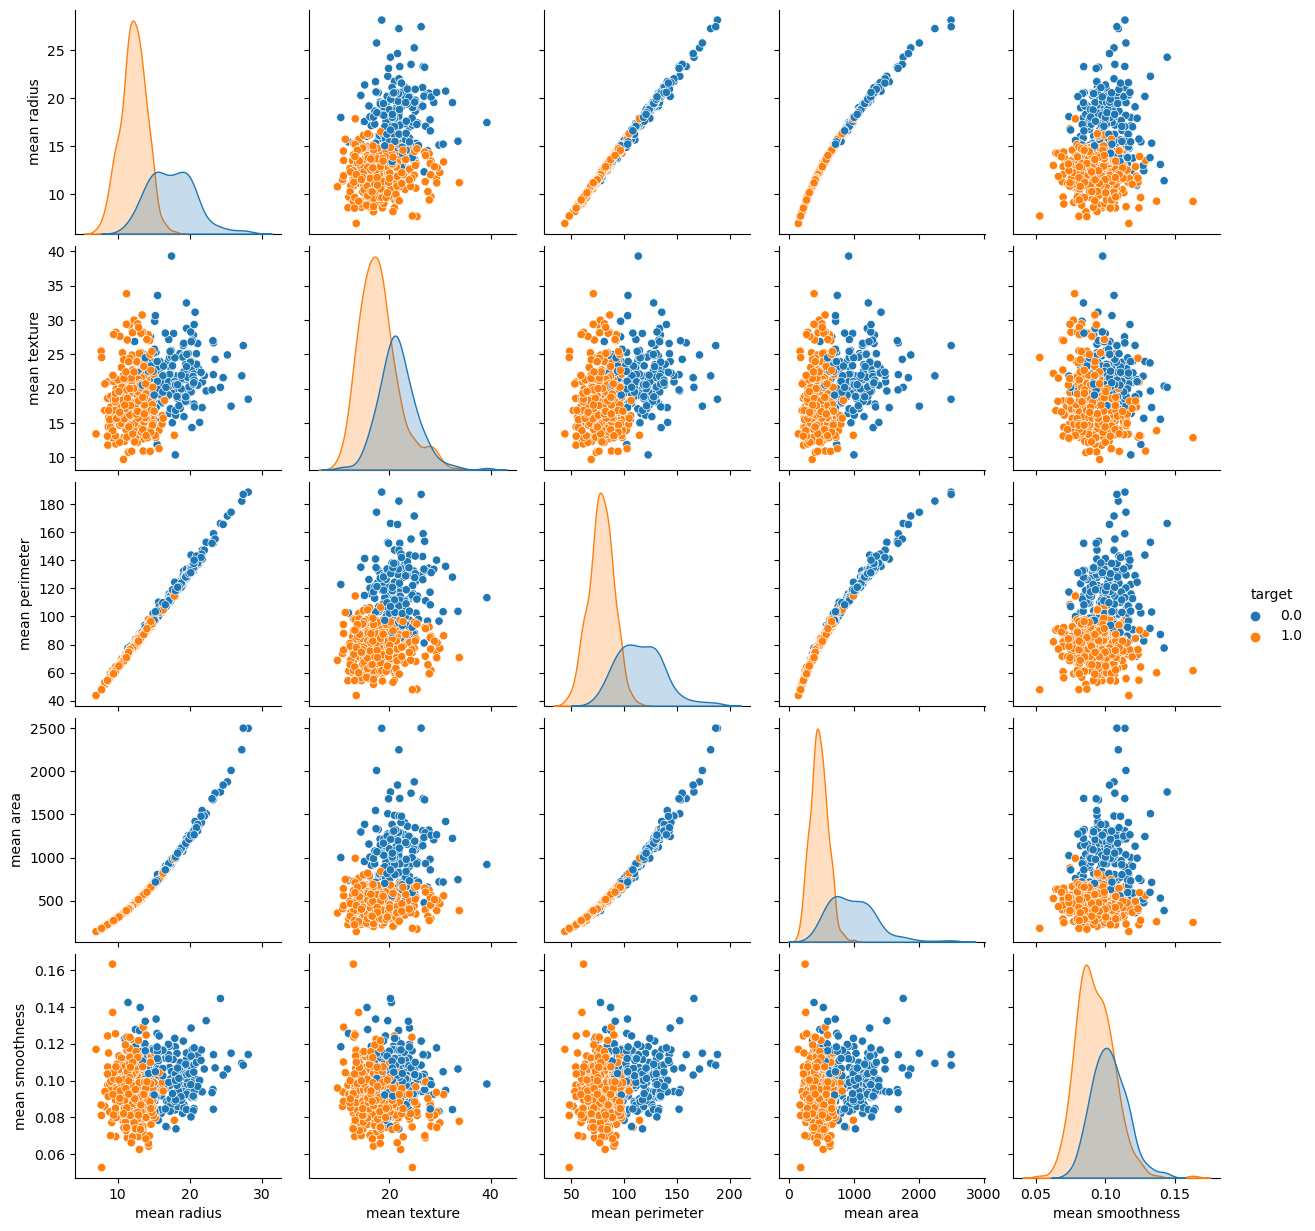

In [17]:
# taking pairplot of sample feature 
sns.pairplot(cancer_df, hue ='target',
            vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])

In [18]:
cancer_df['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

<Axes: xlabel='target', ylabel='count'>

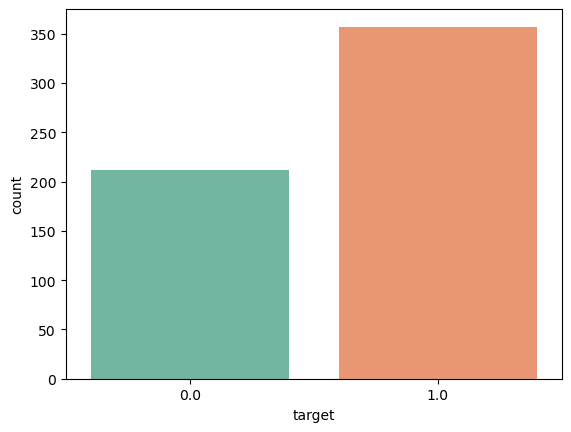

In [19]:
# Count the target class
# sns.countplot(cancer_df['target'], bins=2)
sns.countplot(x='target', data=cancer_df, palette='Set2')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_32756\934437582.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(cancer_df['mean radius'], bins=len(cancer_df['mean radius']),palette='Set2', color='red', edgecolor='black', alpha=0.6, kde=True)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


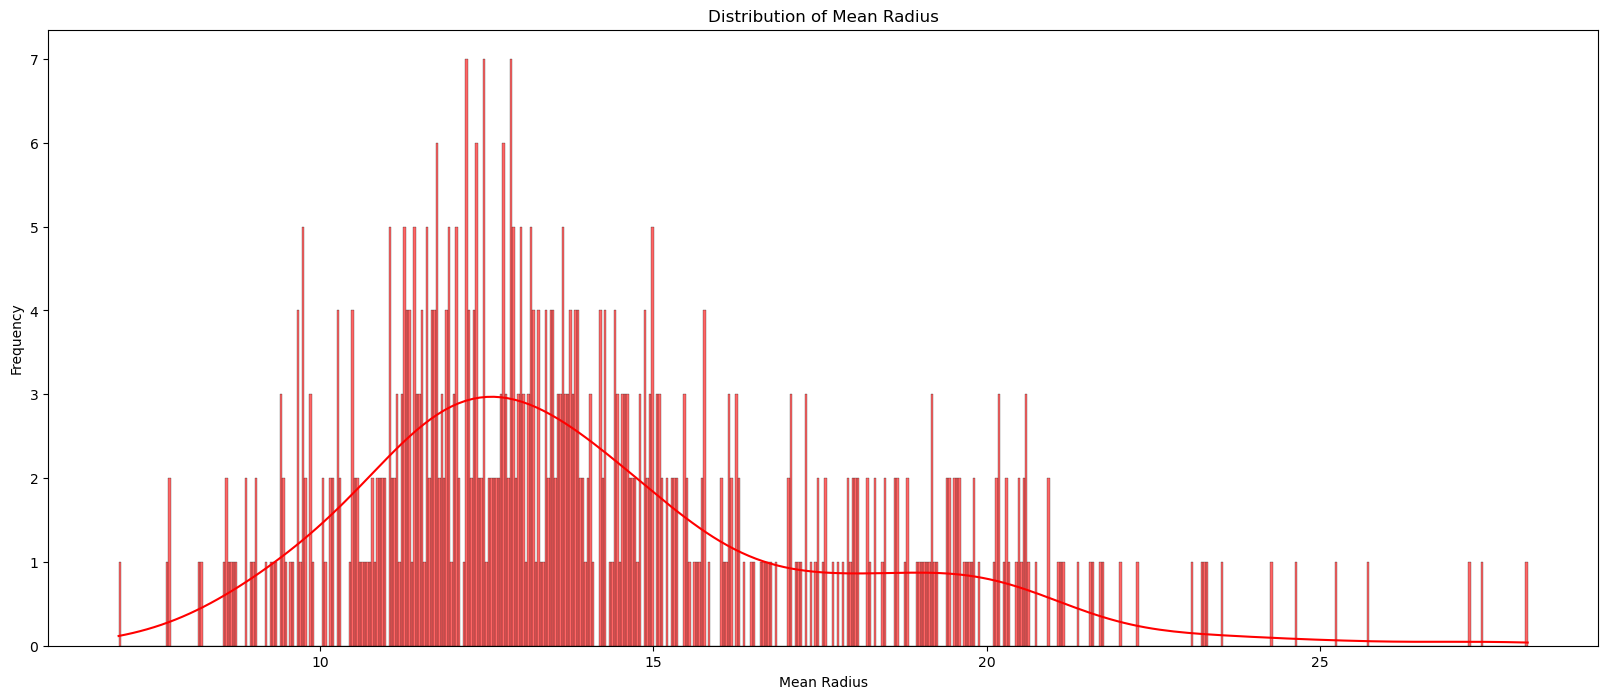

In [20]:
plt.figure(figsize=(20, 8))
sns.histplot(cancer_df['mean radius'], bins=len(cancer_df['mean radius']),palette='Set2', color='red', edgecolor='black', alpha=0.6, kde=True)
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

## **Heatmap**

<Axes: >

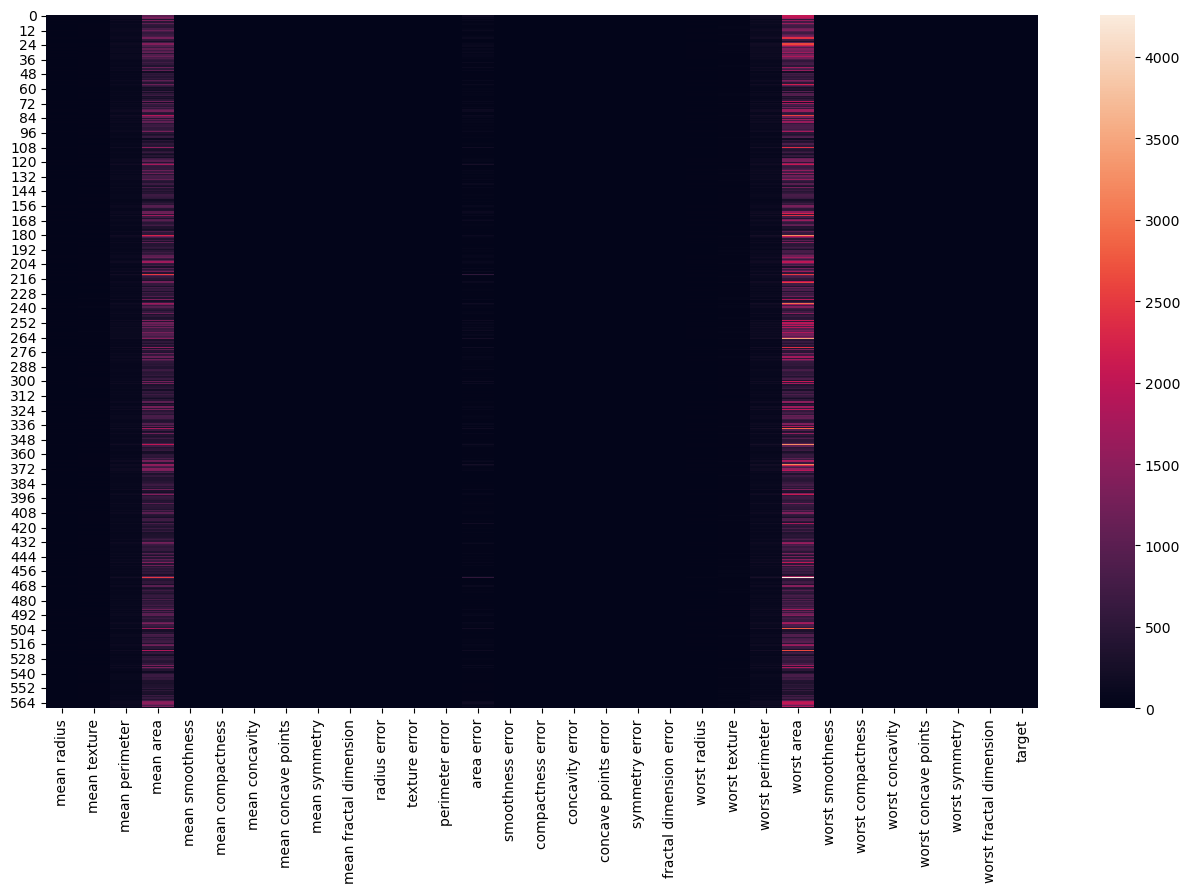

In [21]:
# Heatmap of dataframe
plt.figure(figsize=(16,9))
sns.heatmap(cancer_df)

### **Heatmap of a correlation matrix**

In [22]:
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Axes: >

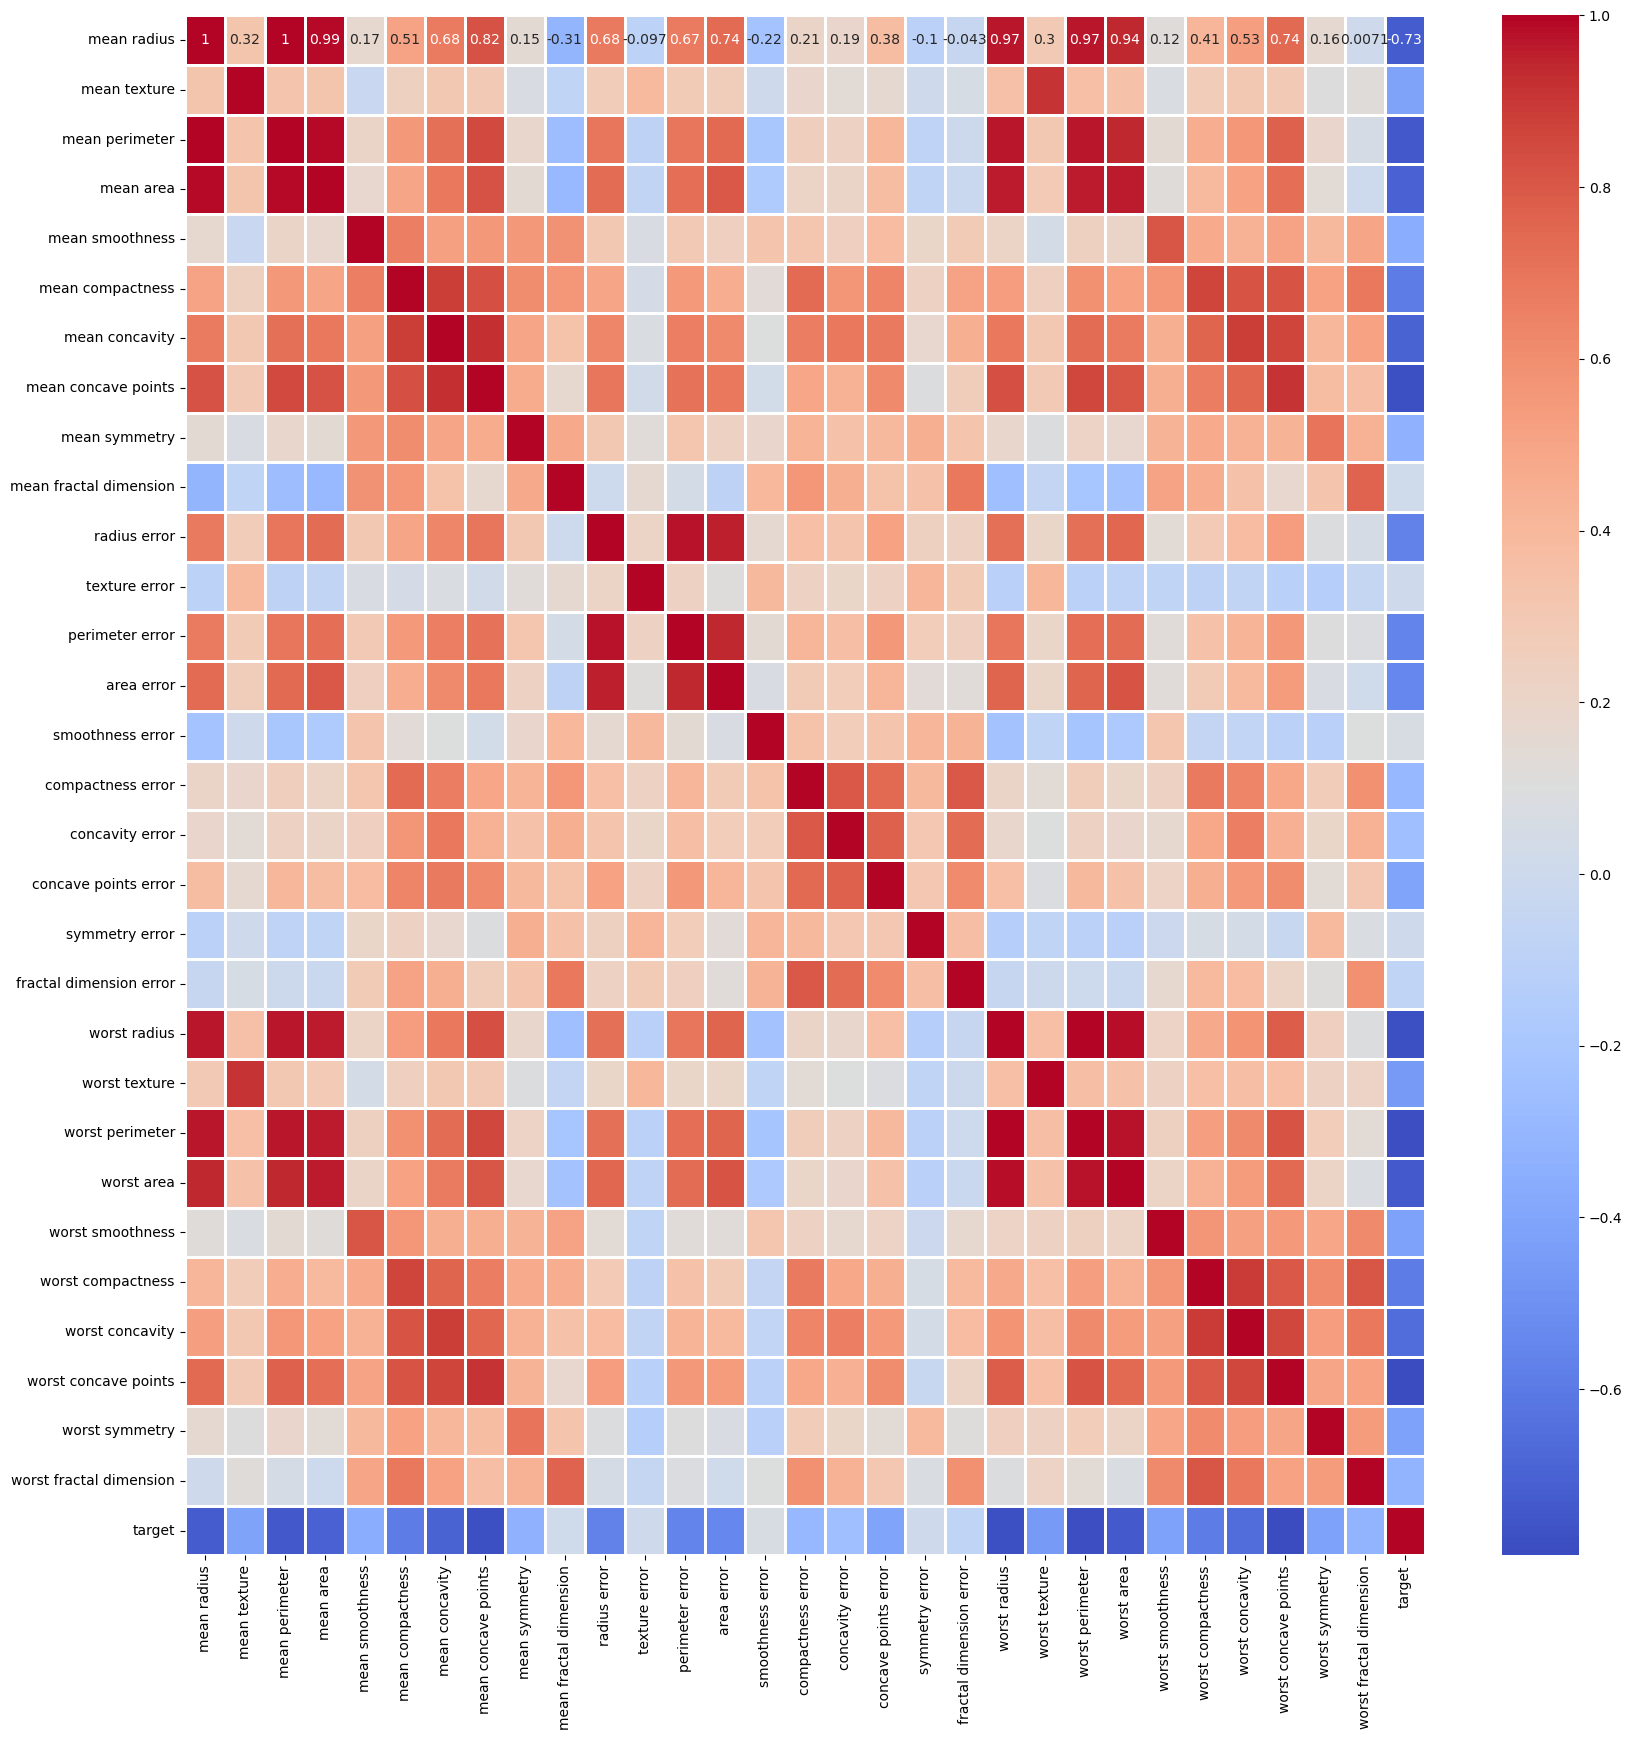

In [23]:
# heatmap of correlation matrix of breast cancer dataframe 
plt.figure(figsize=(20,20))
sns.heatmap(cancer_df.corr(), annot = True, cmap='coolwarm', linewidths=2)

## **Correlation Barplot**

In [24]:
# creating second dataframe by droping target
cancer_df2 = cancer_df.drop(['target'], axis=1)
print('Shape of the cancer_df2 is : ', cancer_df2.shape)

Shape of the cancer_df2 is :  (569, 30)


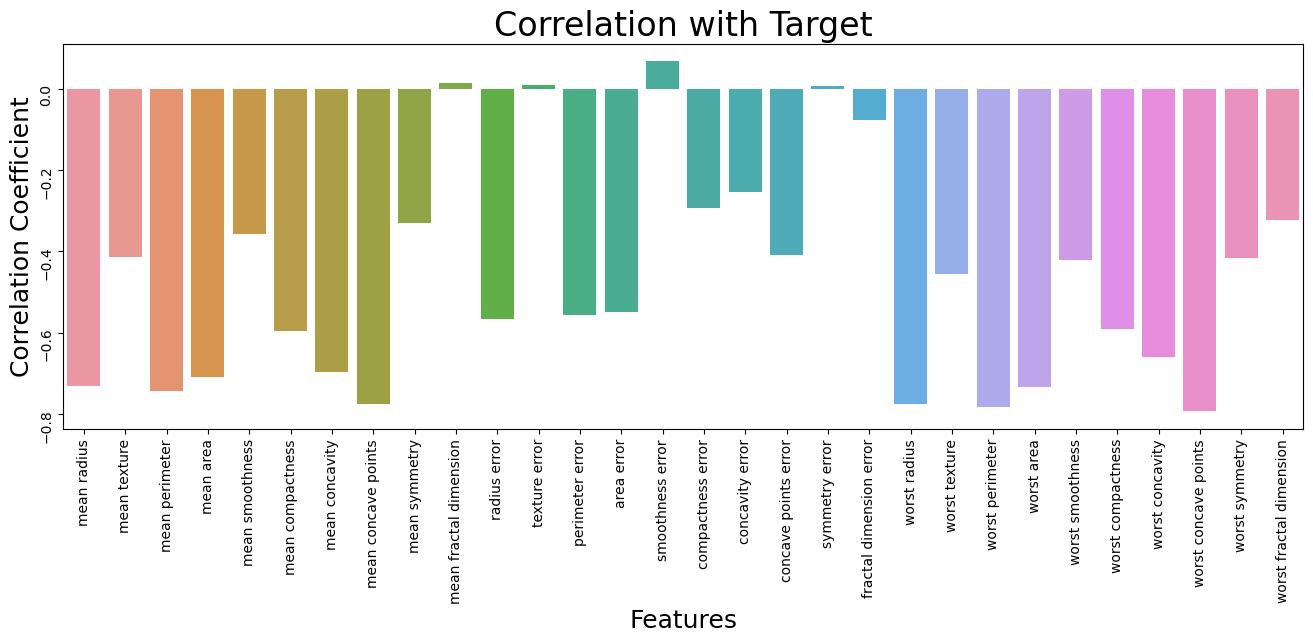

In [25]:
#  visualising the correlation barplot
plt.figure(figsize=(16, 5))
# Calculate the correlation
correlation = cancer_df2.corrwith(cancer_df['target'])

# Create the bar plot
ax = sns.barplot(x=correlation.index, y=correlation.values)

# Rotate the x-axis labels for better visibility
ax.tick_params(labelrotation=90)

# Add titles and labels
plt.title('Correlation with Target', fontsize=24)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Correlation Coefficient', fontsize=18)
plt.show()

## **Split DataFrame in Train and Test**

In [26]:
# input variable
x = cancer_df.drop(['target'], axis =1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
# output variable
y=cancer_df['target']
y.sample(5)

24     0.0
107    1.0
393    0.0
45     0.0
32     0.0
Name: target, dtype: float64

In [28]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [29]:
x_train


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.18110,0.08698,0.2973,0.07745
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.60300,0.14650,0.2597,0.12000
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.34580,0.15640,0.2920,0.07614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.14110,0.3542,0.27790,0.13830,0.2589,0.10300
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.119800,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.90340,0.19640,0.3245,0.11980
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.18550,0.4925,0.73560,0.20340,0.3274,0.12520


In [30]:
y_train

306    1.0
410    1.0
197    0.0
376    1.0
244    0.0
      ... 
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 455, dtype: float64

## **Feature Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_trst_sc = sc.fit_transform(x_test)

## **Machine learning model building**

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### **Support Vector Classifier**

In [33]:
# Support vector classifier 
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)
y_pred_svc = svc_classifier.predict(x_test)
accuracy_score(y_test, y_pred_svc)

0.9385964912280702

In [34]:
# training with Standard Scaled data
svc_classifier2 = SVC()
svc_classifier2.fit(x_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.9473684210526315

### **Logistic Regression**

In [35]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l1', solver='liblinear')
lr_classifier.fit(x_train, y_train)
y_pred_lr = lr_classifier.predict(x_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9649122807017544

In [36]:
# logistic regression with scaled data
from sklearn.linear_model import LogisticRegression
lr_classifier2 = LogisticRegression(random_state = 51, penalty = 'l1', solver='liblinear')
lr_classifier2.fit(x_train, y_train)
y_pred_lr_sc = lr_classifier2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_lr_sc)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.5964912280701754

### **K-Nearest Neighbor Classifier**

In [37]:
# K-Nearest Classifier 
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn_classifier.fit(x_train, y_train)
y_pred_knn = knn_classifier.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.9385964912280702

In [38]:
# K-Nearest Classifier with scaled data 
from sklearn.neighbors import KNeighborsClassifier
knn_classifier2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn_classifier2.fit(x_train_sc, y_train)
y_pred_knn_sc = knn_classifier2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.956140350877193

### **Naive Bayes Classifier**

In [39]:
# Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
y_pred_nb = nb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_nb)

0.9473684210526315

In [40]:
# Naive Bayes Classifier with scaled data
from sklearn.naive_bayes import GaussianNB
nb_classifier2 = GaussianNB()
nb_classifier2.fit(x_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.9473684210526315

### **Decision Tree Classifier**

In [41]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(criterion ='entropy', random_state=51)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_score(y_test, y_pred_dt)

0.9473684210526315

In [42]:
# Decision Tree Classifier with scaled data
from sklearn.tree import DecisionTreeClassifier
dt2 =DecisionTreeClassifier(criterion ='entropy', random_state=51)
dt2.fit(x_train, y_train)
y_pred_dt_sc = dt2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_dt_sc)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7017543859649122

### **Random Forest Classifier**

In [43]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=51)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.9736842105263158

In [44]:
# random forest classifier wiht scaled data
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=51)
rf2.fit(x_train, y_train)
y_pred_rf_sc = rf2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_rf_sc)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.7192982456140351

### **AdaBoost Classifier**

In [45]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier 
adb = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', random_state=200),
                        n_estimators= 2000,
                        learning_rate=0.1,
                        algorithm='SAMME.R',
                        random_state=1,)
adb.fit(x_train, y_train)
y_pred_adb = adb.predict(x_test)
accuracy_score(y_test, y_pred_adb)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9473684210526315

In [46]:
# AdaBoost Classifier with classifier
from sklearn.ensemble import AdaBoostClassifier 
adb2 = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', random_state=200),
                        n_estimators= 2000,
                        learning_rate=0.1,
                        algorithm='SAMME.R',
                        random_state=1,)
adb2.fit(x_train_sc, y_train)
y_pred_adb_sc = adb2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_adb_sc)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9385964912280702

### **XGBoost Classifier**

In [47]:
# XGBoost Classifier
from xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.9824561403508771

In [48]:
# xgboost classifier with the scaled data
xgb2 = XGBClassifier()
xgb2.fit(x_train_sc, y_train)
y_pred_xgb_sc = xgb2.predict(x_trst_sc)
accuracy_score(y_test, y_pred_xgb_sc)

0.9736842105263158

### **XGBoost Parameter Tuning - Randomized Search**

In [49]:
params ={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [50]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [51]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [53]:
# training xgboost classifier with best parameters
xgb_pt = XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bynode=1,
    colsample_bytree=0.4,
    gamma=0.2,
    learning_rate=0.1,
    max_delta_step=0,
    max_depth=10,
    min_child_weight=1,
    missing=np.nan,  # Set missing to np.nan
    n_estimators=100,
    n_jobs=1,
    objective='binary:logistic',
    random_state=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1
)

# Fit the model
xgb_pt.fit(x_train_sc, y_train)

# Predict and calculate accuracy
y_pred_xgb_pt = xgb_pt.predict(x_trst_sc)
accuracy_score(y_test, y_pred_xgb_pt)
# print("Accuracy:", accuracy)


0.9649122807017544

### **Confusion Matrix**

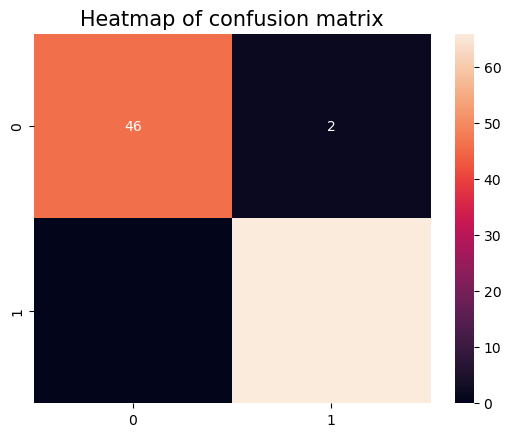

In [54]:
# confusion matrix to see the model is overfitting or not 
# plt.figure(figsize=(16,8))
cm = confusion_matrix(y_test, y_pred_xgb)
plt.title('Heatmap of confusion matrix', fontsize=15)
sns.heatmap(cm, annot=True)
plt.show()

1. The model is giving 0 type II error and it is best 

## **Classification Report of the model**

In [55]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### **Cross-validation of the ML model**

In [56]:
# cross validation for checking if the model is overfitting or underfitting 
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator=xgb, X=x_train, y= y_train, cv=10 )
print("Cross validation of teh XGBoost Model = ", cross_validation)
print("\nCross validation of teh XGBoost Model(in mean) = ", cross_validation.mean())


Cross validation of teh XGBoost Model =  [1.         0.97826087 0.97826087 1.         0.91304348 1.
 1.         1.         0.97777778 0.91111111]

Cross validation of teh XGBoost Model(in mean) =  0.9758454106280194


**Saving XGBoost model using pickle**

In [57]:
import pickle 
# save model 
pickle.dump(xgb, open('breast_cancer_detector.pkl', 'wb'))

# load model 
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pkl', 'rb'))

# pridicting output
y_pred= breast_cancer_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of XGBoost model: \n', confusion_matrix(y_test, y_pred), '\n')

# show the accuracy 
print('Accuracy of the XGBoost model = ', accuracy_score(y_test, y_pred))

Confusion matrix of XGBoost model: 
 [[46  2]
 [ 0 66]] 

Accuracy of the XGBoost model =  0.9824561403508771


**End ==============================================**

In [58]:
!pip freeze > requirements1.txt
